This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/) 

In [1]:
try:
    import byron
except ModuleNotFoundError:
    !pip install -U byron
    import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_16972/288499090.py:2: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://cad-polito-it.github.io/byron/paranoia for details]
  import byron


Everything for the definition of the constraints (the old "instruction library") is under the namespace `byron.framework` (lazy fingers can use `byron.f`)

# Global References

*Global References* creates a reference to a *macro* in a subtree that starts with a *frame* of a given type.

## *Internal* Global References

A reference to a macro in the same tree.

; 🖋 n1 ➜ Frame❬FrameSequence#1❭
; 🖋 n1.n2 ➜ Frame❬MacroArray#1❭
foo #0f41  ; 🖋 n1.n2.n3 ➜ Macro❬User#1❭
n4:
foo #2ff8  ; 🖋 n1.n2.n4 ➜ Macro❬User#1❭
foo #6ff1  ; 🖋 n1.n2.n5 ➜ Macro❬User#1❭
foo #771f  ; 🖋 n1.n2.n6 ➜ Macro❬User#1❭
n7:
foo #0d96  ; 🖋 n1.n2.n7 ➜ Macro❬User#1❭
; 🖋 n1.n8 ➜ Frame❬MacroArray#2❭
global_ref: n7  ; 🖋 n1.n8.n9 ➜ Macro❬User#3❭
global_ref: n4  ; 🖋 n1.n8.n10 ➜ Macro❬User#3❭
global_ref: n7  ; 🖋 n1.n8.n11 ➜ Macro❬User#3❭



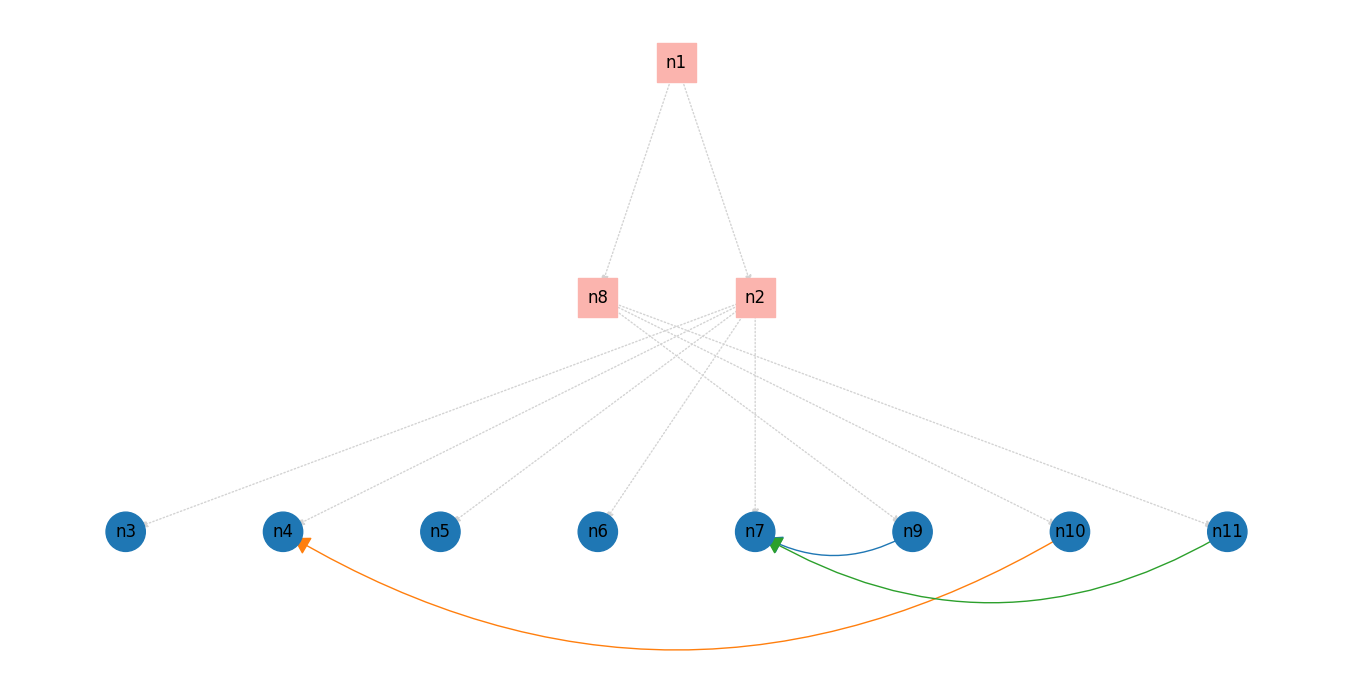

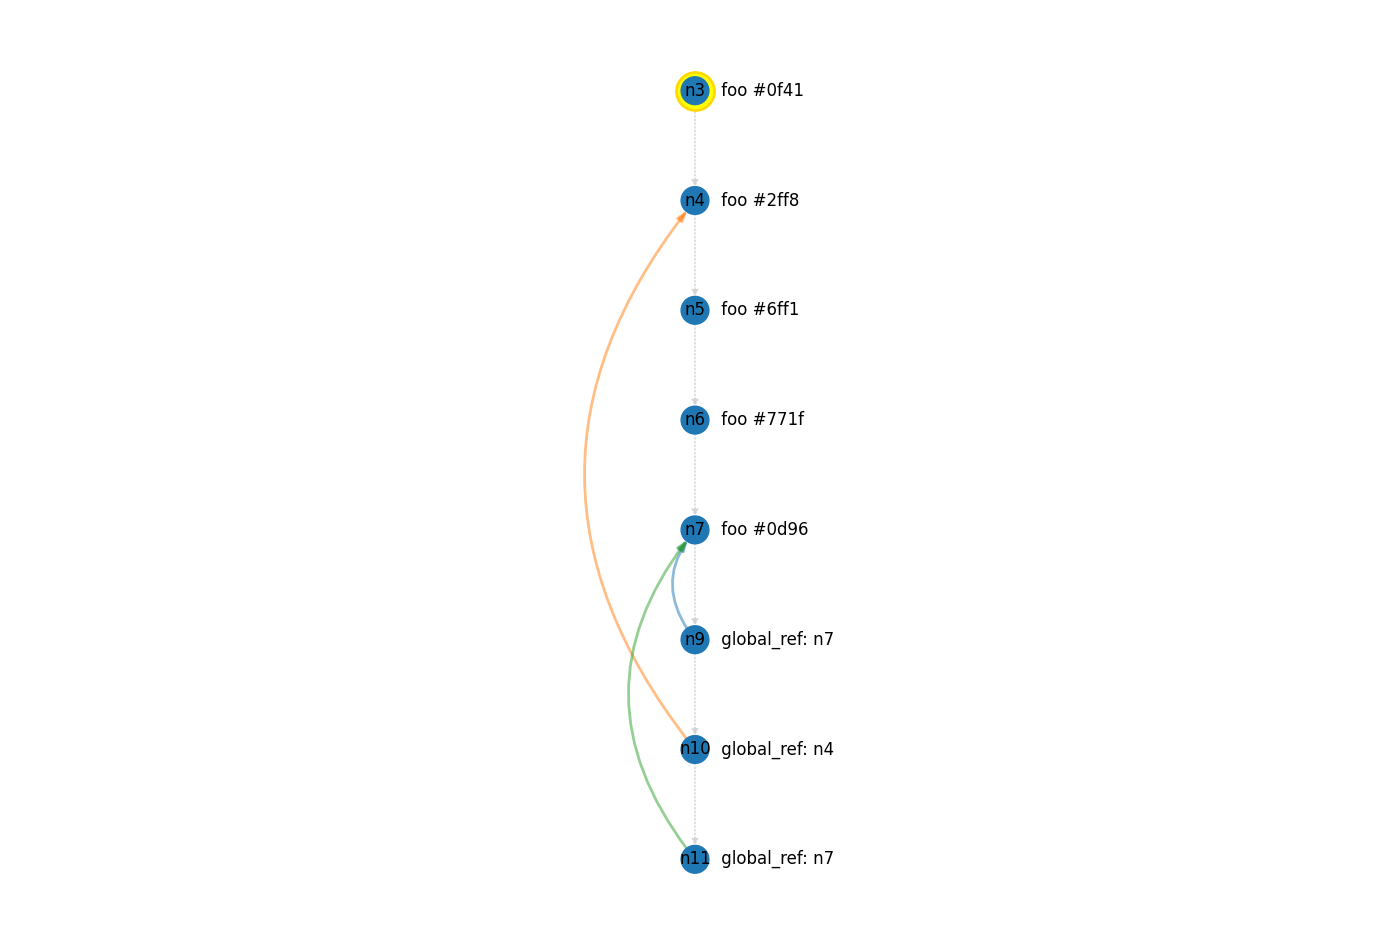

In [2]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))

foo_bunch = byron.f.bunch([macro_foo], size=5)
macro_ref = byron.f.macro('global_ref: {ref}', ref=byron.f.global_reference(foo_bunch))
ref_bunch = byron.f.bunch([macro_ref], size=3)
program = byron.f.sequence([foo_bunch, ref_bunch])

byron.f.as_text(program)
byron.f.as_forest(program)
byron.f.as_lgp(program)

References may use the `frame` class or the name of a *frame class* (see *string magic* with frames). Remember that all names are **unique** (thus they me defined only once).

In [3]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_ref = byron.f.macro('global_ref: {ref}', ref=byron.f.global_reference('foo_bunch_name'))

foo_bunch = byron.f.bunch([macro_foo], size=5, name='foo_bunch_name')
ref_bunch = byron.f.bunch([macro_ref], size=3)
program = byron.f.sequence([foo_bunch, ref_bunch])

byron.f.as_text(program)

; 🖋 n56 ➜ Frame❬FrameSequence#2❭
; 🖋 n56.n57 ➜ Frame❰foo_bunch_name❱
foo #0f41  ; 🖋 n56.n57.n58 ➜ Macro❬User#1❭
n59:
foo #2ff8  ; 🖋 n56.n57.n59 ➜ Macro❬User#1❭
foo #6ff1  ; 🖋 n56.n57.n60 ➜ Macro❬User#1❭
foo #771f  ; 🖋 n56.n57.n61 ➜ Macro❬User#1❭
n62:
foo #0d96  ; 🖋 n56.n57.n62 ➜ Macro❬User#1❭
; 🖋 n56.n63 ➜ Frame❬MacroArray#3❭
global_ref: n62  ; 🖋 n56.n63.n64 ➜ Macro❬User#4❭
global_ref: n59  ; 🖋 n56.n63.n65 ➜ Macro❬User#4❭
global_ref: n62  ; 🖋 n56.n63.n66 ➜ Macro❬User#4❭



## *External* Global References

A reference to a different frame in a different tree. The `global_reference` must be allowed to create new frames. The *creative_zeal* $z$ defines the willingness to create new trees: if $z$ is an integer, then the probability to create the target $T_{n+1}$ if $n$ compatible targets $T_0, T_1, ..., T_n$ already exist is $p=1-\frac{n}{n+z}$; if $z$ is a float, then the probability is simply $p = z$. If $p > 0$ and $n=0$ then the first tree is always created. 

; 🖋 n67 ➜ Frame❬MacroArray#5❭
foo #347a  ; 🖋 n67.n68 ➜ Macro❬User#1❭
GOTO n74  ; 🖋 n67.n69 ➜ Macro❬User#5❭
foo #d6cb  ; 🖋 n67.n70 ➜ Macro❬User#1❭
foo #70dd  ; 🖋 n67.n71 ➜ Macro❬User#1❭
foo #e5fe  ; 🖋 n67.n72 ➜ Macro❬User#1❭
; 🖋 n73 ➜ Frame❬MacroArray#4❭
n74:
bar -0.56  ; 🖋 n73.n74 ➜ Macro❬User#2❭
bar +0.011  ; 🖋 n73.n75 ➜ Macro❬User#2❭
bar -0.95  ; 🖋 n73.n76 ➜ Macro❬User#2❭



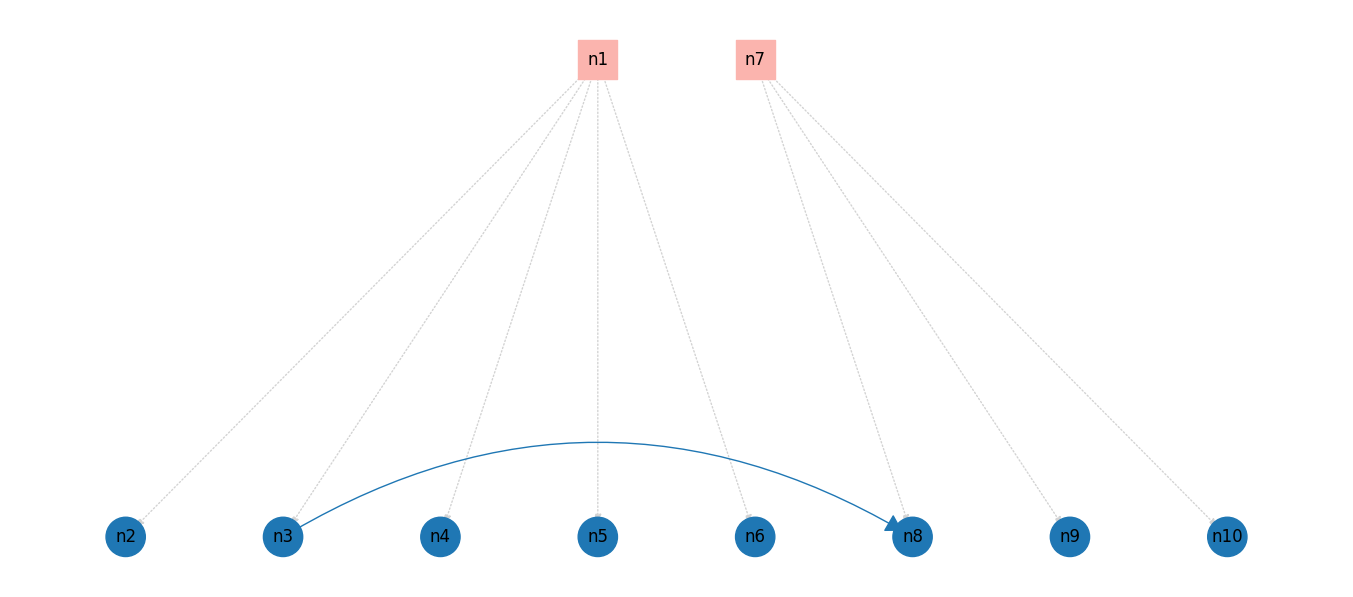

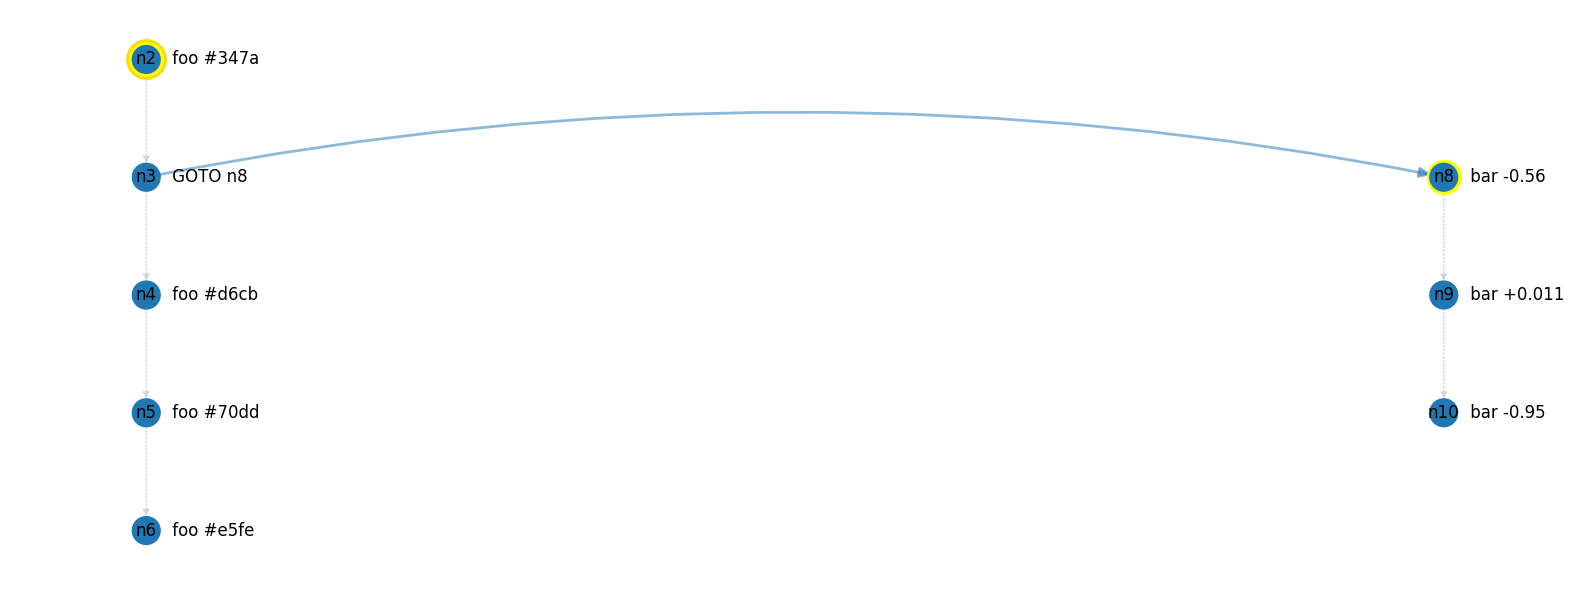

In [4]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
external_frame = byron.f.bunch([macro_bar], size=3)
macro_ref = byron.f.macro('GOTO {ref}', ref=byron.f.global_reference(external_frame, creative_zeal=1))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)

Global references may be forced to always hit the very first maco in a frame

; 🖋 n117 ➜ Frame❬MacroArray#7❭
foo #347a  ; 🖋 n117.n118 ➜ Macro❬User#1❭
CALL n124  ; 🖋 n117.n119 ➜ Macro❬User#6❭
foo #d6cb  ; 🖋 n117.n120 ➜ Macro❬User#1❭
foo #70dd  ; 🖋 n117.n121 ➜ Macro❬User#1❭
foo #e5fe  ; 🖋 n117.n122 ➜ Macro❬User#1❭
; 🖋 n123 ➜ Frame❬MacroArray#6❭
n124:
bar -0.56  ; 🖋 n123.n124 ➜ Macro❬User#2❭
bar +0.011  ; 🖋 n123.n125 ➜ Macro❬User#2❭
bar -0.95  ; 🖋 n123.n126 ➜ Macro❬User#2❭



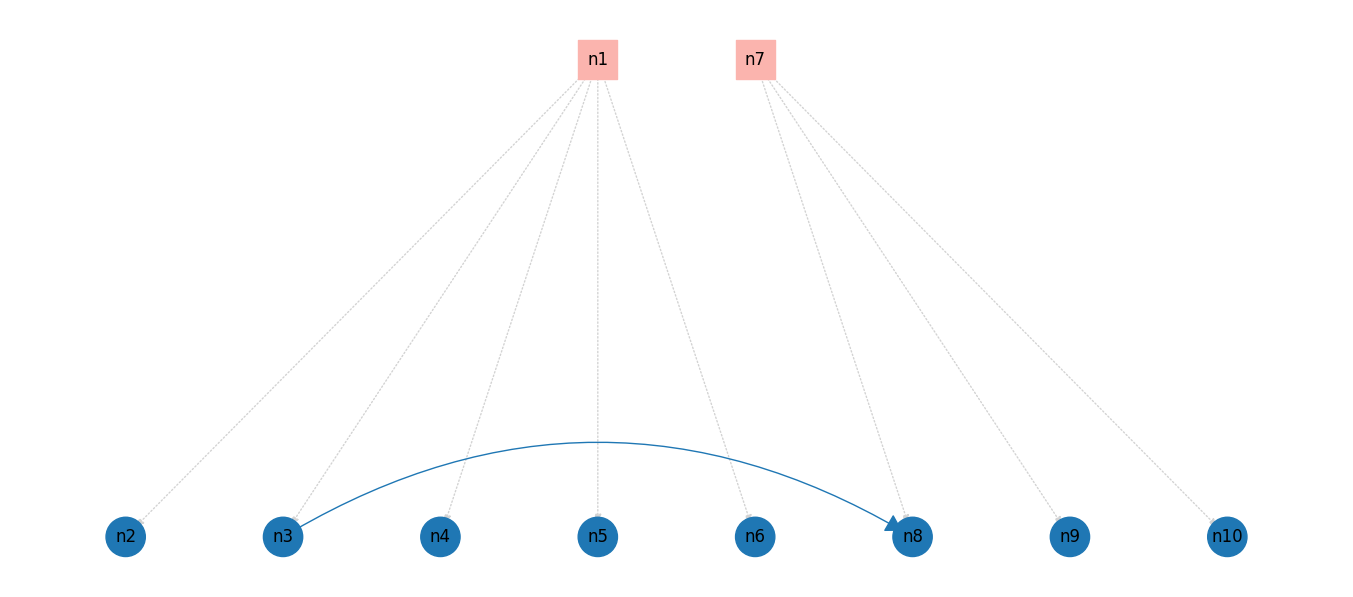

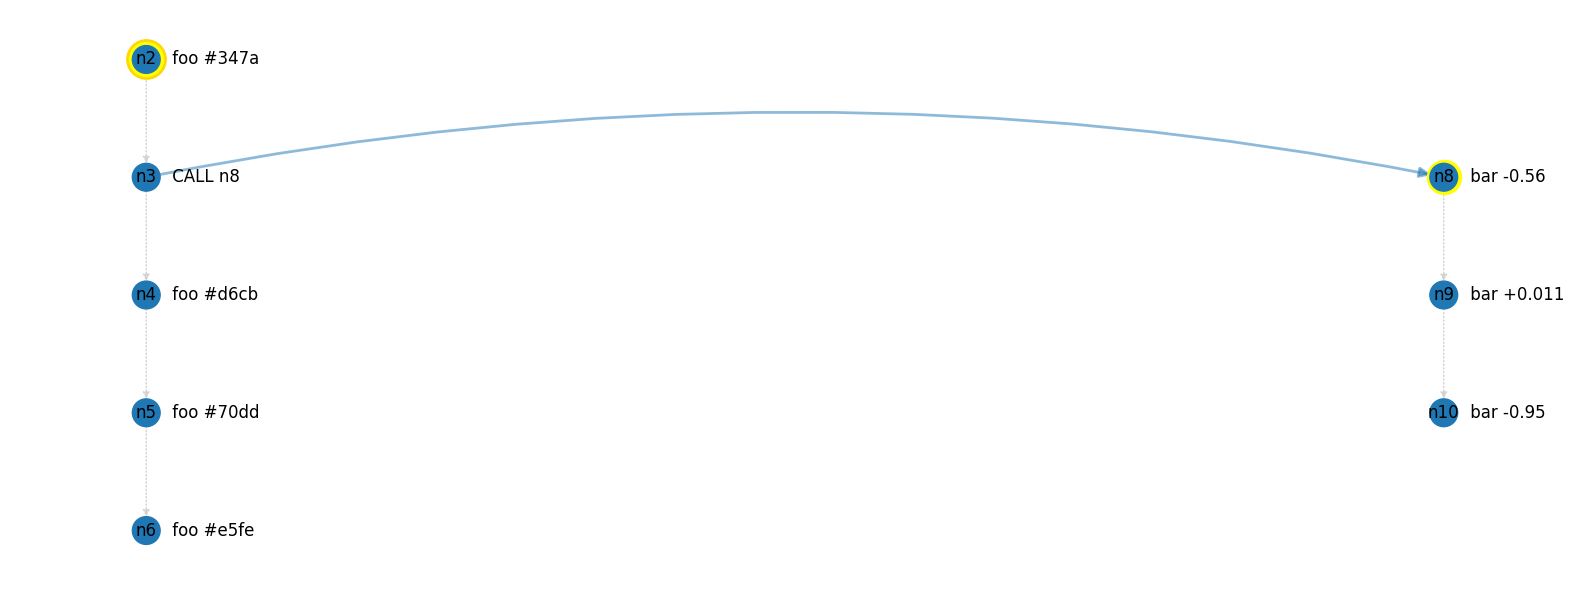

In [5]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
external_frame = byron.f.bunch([macro_bar], size=3)
macro_ref = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(external_frame, creative_zeal=1, first_macro=True))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)

Labels may be tweaked in different ways

In [6]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1), _label='PROC {_node}:\n')
external_frame = byron.f.bunch([macro_bar], size=3)
macro_ref = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(external_frame, creative_zeal=1, first_macro=True))
main_frame = byron.f.bunch([macro_foo, macro_ref], size=5)

byron.f.as_text(main_frame)

; 🖋 n167 ➜ Frame❬MacroArray#9❭
foo #347a  ; 🖋 n167.n168 ➜ Macro❬User#1❭
CALL n174  ; 🖋 n167.n169 ➜ Macro❬User#8❭
foo #d6cb  ; 🖋 n167.n170 ➜ Macro❬User#1❭
foo #70dd  ; 🖋 n167.n171 ➜ Macro❬User#1❭
foo #e5fe  ; 🖋 n167.n172 ➜ Macro❬User#1❭
; 🖋 n173 ➜ Frame❬MacroArray#8❭
PROC n174:
bar -0.56  ; 🖋 n173.n174 ➜ Macro❬User#7❭
bar +0.011  ; 🖋 n173.n175 ➜ Macro❬User#7❭
bar -0.95  ; 🖋 n173.n176 ➜ Macro❬User#7❭



However, forcing a custom `_label` in *macro_bar* would use it everywhere a macro_bar is used. It is better to create a special macro just for the first line and customize it.

; 🖋 n177 ➜ Frame❬MacroArray#11❭
foo #2c83  ; 🖋 n177.n178 ➜ Macro❬User#1❭
bar +0.18  ; 🖋 n177.n179 ➜ Macro❬User#2❭
foo #1045  ; 🖋 n177.n180 ➜ Macro❬User#1❭
foo #0f41  ; 🖋 n177.n181 ➜ Macro❬User#1❭
foo #2ff8  ; 🖋 n177.n182 ➜ Macro❬User#1❭
foo #6ff1  ; 🖋 n177.n183 ➜ Macro❬User#1❭



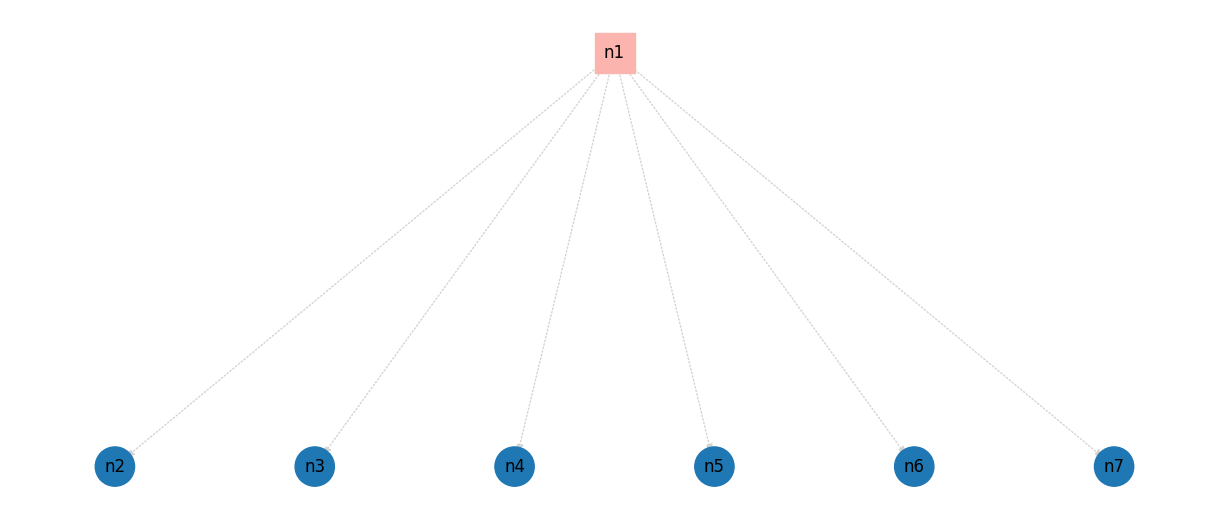

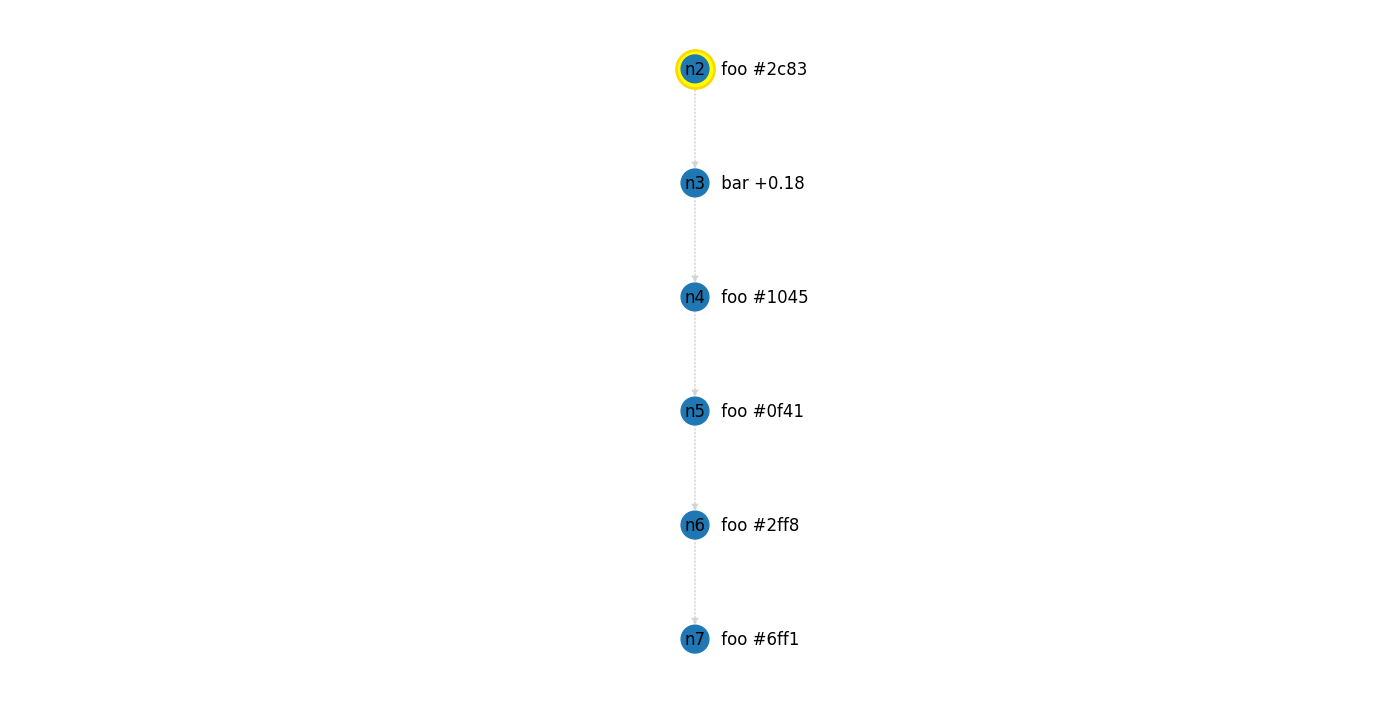

In [7]:
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
sub_header = byron.f.macro('; ini {_node}', _label='PROC {_node}:\n')
subroutines = byron.f.sequence([sub_header, byron.f.bunch([macro_foo, macro_bar], size=3)])
macro_call = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(subroutines, creative_zeal=1, first_macro=True))
main_frame = byron.f.bunch([macro_foo, macro_bar, macro_call], weights=(2, 2, 1), size=6)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)

By default external frames are dumped after the main one, burt the order may be tweaked. In the example, using *force_parent*, `n10` (the beginning of the tree containing subroutines, *Frame❬FrameSequence#4❭*) is dumped after `n2` (the placeholder, *Macro❬Text#2❭*)

; 🖋 n212 ➜ Frame❬FrameSequence#5❭
; 🖋 n212.n213 ➜ Macro❬Text#2❭
; 🖋 n221 ➜ Frame❬FrameSequence#4❭
PROC n222:
; init n222  ; 🖋 n221.n222 ➜ Macro❬Text#3❭
; 🖋 n221.n223 ➜ Frame❬MacroArray#12❭
foo #6ff1  ; 🖋 n221.n223.n224 ➜ Macro❬User#1❭
foo #771f  ; 🖋 n221.n223.n225 ➜ Macro❬User#1❭
foo #0d96  ; 🖋 n221.n223.n226 ➜ Macro❬User#1❭
; 🖋 n212.n214 ➜ Frame❬MacroArray#13❭
foo #347a  ; 🖋 n212.n214.n215 ➜ Macro❬User#1❭
CALL n222  ; 🖋 n212.n214.n216 ➜ Macro❬User#10❭
bar +0.43  ; 🖋 n212.n214.n217 ➜ Macro❬User#2❭
foo #d6cb  ; 🖋 n212.n214.n218 ➜ Macro❬User#1❭
foo #70dd  ; 🖋 n212.n214.n219 ➜ Macro❬User#1❭
foo #e5fe  ; 🖋 n212.n214.n220 ➜ Macro❬User#1❭



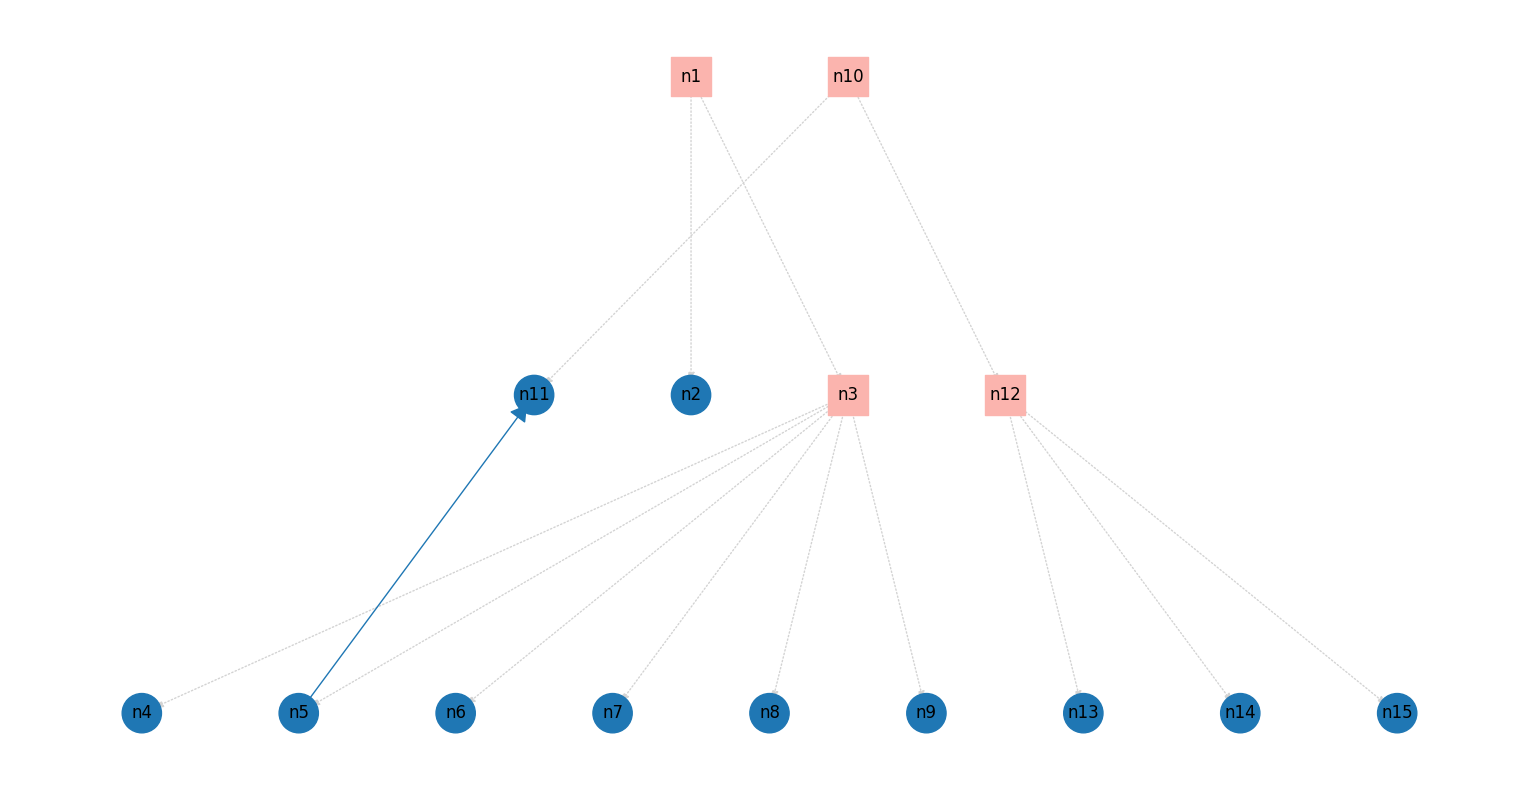

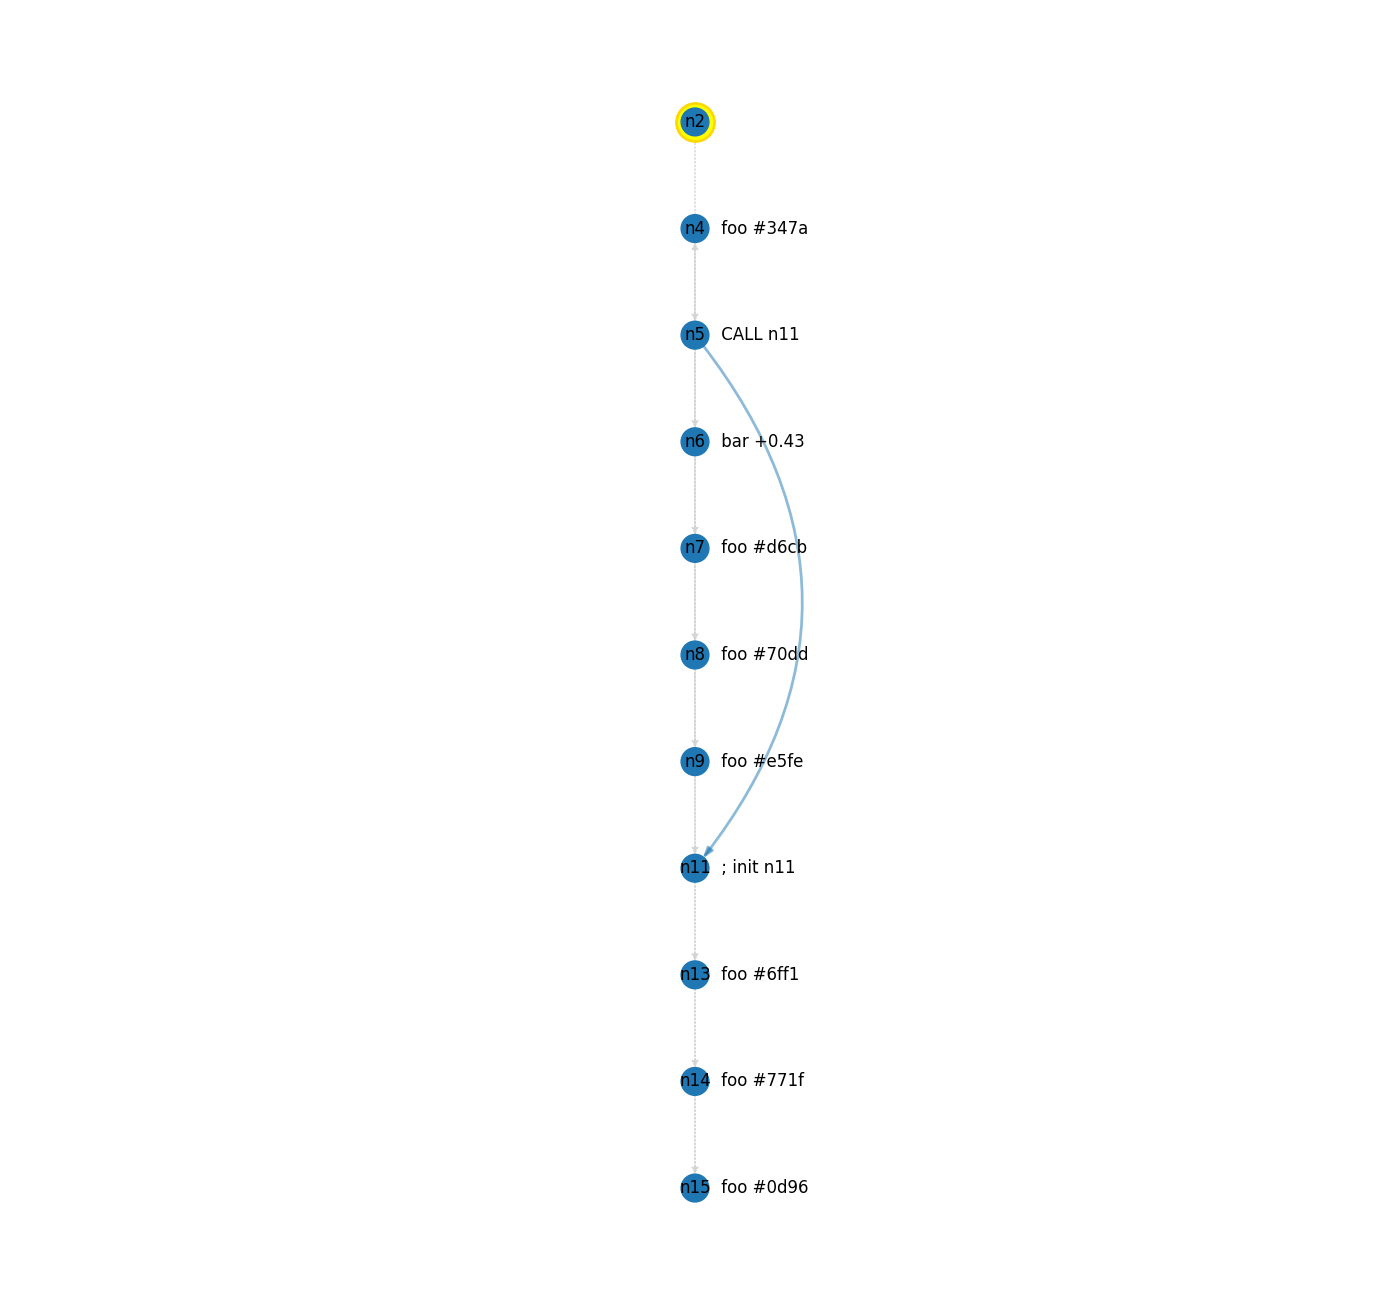

In [8]:
placeholder = byron.f.macro('')
macro_foo = byron.f.macro('foo #{num:04x}', num=byron.f.integer_parameter(0, 2 ** 16))
macro_bar = byron.f.macro('bar {num:+0.2g}', num=byron.f.float_parameter(-1, 1))
sub_header = byron.f.macro('; init {_node}', _label='PROC {_node}:\n')
subroutines = byron.f.sequence([sub_header, byron.f.bunch([macro_foo, macro_bar], size=3)])
macro_call = byron.f.macro('CALL {ref}', ref=byron.f.global_reference(subroutines, creative_zeal=1, first_macro=True))
main_frame = byron.f.sequence(
    [placeholder, byron.f.bunch([macro_foo, macro_bar, macro_call], weights=(1, 1, 1), size=6)]
)
subroutines.force_parent(placeholder)

byron.f.as_text(main_frame)
byron.f.as_forest(main_frame)
byron.f.as_lgp(main_frame)